In [1]:
sheet2 = pd.read_csv('sheet2.csv')

In [2]:
sheet2 = sheet2.drop(axis=0, index=21469)
sheet2 = sheet2.reset_index(drop=True)

In [3]:
for obj_col in ['数量', '単価', '売上']:
    sheet2[obj_col] = sheet2[obj_col].str.replace(',', '')
    sheet2[obj_col] = sheet2[obj_col].str.replace('(', '')
    sheet2[obj_col] = sheet2[obj_col].str.replace(')', '')

In [4]:
sheet2['数量'] = sheet2['数量'].astype('int')
sheet2['単価'] = sheet2['単価'].astype('int')
sheet2['売上'] = sheet2['売上'].astype('int')

In [6]:
for i in range(len(sheet2)):
    sheet2.loc[i, '売上月'] = str(sheet2.loc[i, '売上日'])[:-2]

In [7]:
from datetime import date
import datetime

In [8]:
for i in range(len(sheet2)):
    sheet2.loc[i, '年'] = datetime.datetime.strptime(
        str(sheet2.loc[i, '売上日']), "%Y%m%d").isocalendar()[0]

In [16]:
sheet2['年度'] = sheet2['年']
sheet2.loc[sheet2['月'] == 1, '年度'] -= 1
sheet2.loc[sheet2['月'] == 2, '年度'] -= 1
sheet2.loc[sheet2['月'] == 3, '年度'] -= 1

In [10]:
for i in range(len(sheet2)):
    sheet2.loc[i, '月'] = str(sheet2.loc[i, '売上日'])[4:6]

In [11]:
for i in range(len(sheet2)):
    sheet2.loc[i, '週'] = datetime.datetime.strptime(
        str(sheet2.loc[i, '売上日']), "%Y%m%d").isocalendar()[1]

In [12]:
for i in range(len(sheet2)):
    sheet2.loc[i, '曜日'] = datetime.datetime.strptime(
        str(sheet2.loc[i, '売上日']), "%Y%m%d").isocalendar()[2]

In [17]:
for i in range(len(sheet2)):
    if sheet2.loc[i, '年度'] == 2015:
        sheet2.loc[i, '日'] = (datetime.datetime.strptime(
            str(sheet2.loc[i, '売上日']), "%Y%m%d") - datetime.datetime(2015, 4, 1)).days + 1
    elif sheet2.loc[i, '年度'] == 2016:
        sheet2.loc[i, '日'] = (datetime.datetime.strptime(
            str(sheet2.loc[i, '売上日']), "%Y%m%d") - datetime.datetime(2016, 4, 1)).days + 1

In [18]:
sheet2['年'] = sheet2['年'].astype(int)
sheet2['月'] = sheet2['月'].astype(int)
sheet2['週'] = sheet2['週'].astype(int)
sheet2['曜日'] = sheet2['曜日'].astype(int)
sheet2['日'] = sheet2['日'].astype(int)

# ・売上の概観

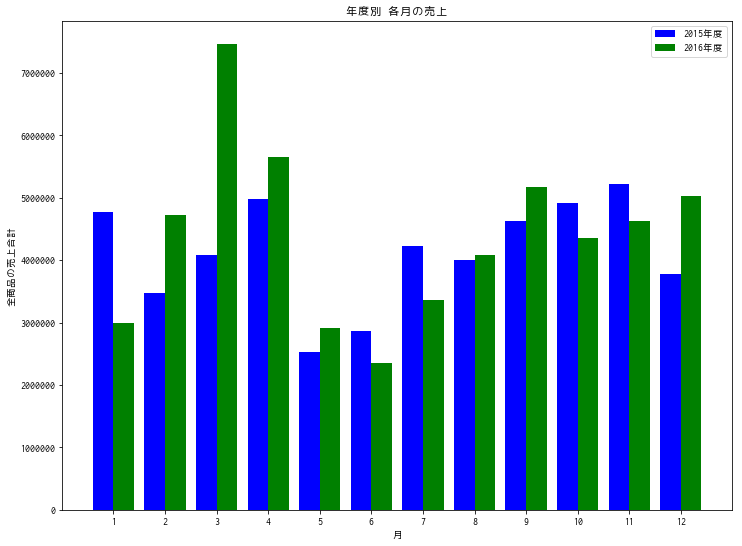

In [19]:
w = 0.4
Y1 = sheet2.loc[sheet2['年度'] == 2015, :].groupby(by='月')['売上'].sum().values
Y2 = sheet2.loc[sheet2['年度'] == 2016, :].groupby(by='月')['売上'].sum().values
X = np.arange(len(Y1))


plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.xticks(X + w/2, X+1)
plt.title('年度別 各月の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_month', dpi=200)
plt.show()

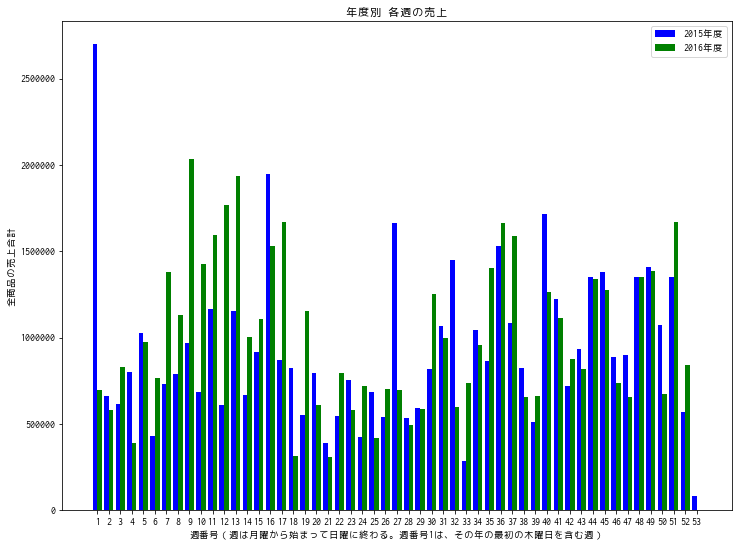

In [20]:
w = 0.4
Y1 = sheet2.loc[sheet2['年度'] == 2015, :].groupby(by='週')['売上'].sum().values
Y2 = list(sheet2.loc[sheet2['年度'] == 2016, :].groupby(
    by='週')['売上'].sum().values)
Y2.append(0)
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.xticks(X + w/2, X+1)
plt.title('年度別 各週の売上')
plt.xlabel('週番号（週は月曜から始まって日曜に終わる。週番号1は、その年の最初の木曜日を含む週）')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_week', dpi=200)
plt.show()

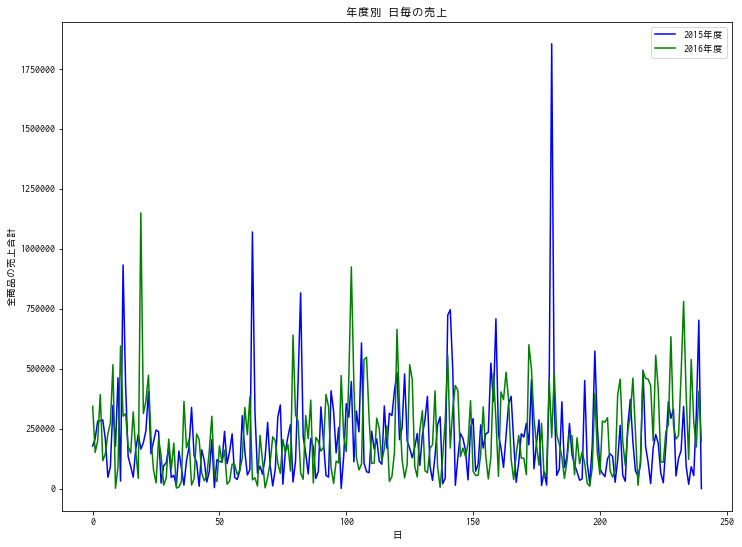

In [22]:
Y1 = list(sheet2.loc[sheet2['年度'] == 2015, :].groupby(
    by='日')['売上'].sum().values)
Y1.append(0)
Y2 = sheet2.loc[sheet2['年度'] == 2016, :].groupby(by='日')['売上'].sum().values
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.plot(X, Y1, color='b', label='2015年度')
plt.plot(X, Y2, color='g', label='2016年度')
plt.legend(loc="best")
plt.title('年度別 日毎の売上')
plt.xlabel('日')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_date', dpi=200)
plt.show()

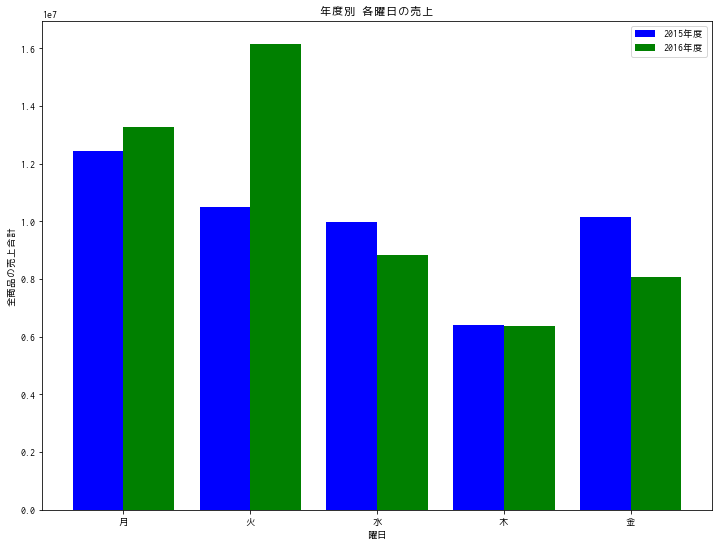

In [81]:
w = 0.4
Y1 = sheet2.loc[sheet2['年度'] == 2015, :].groupby(by='曜日')['売上'].sum().values
Y2 = sheet2.loc[sheet2['年度'] == 2016, :].groupby(by='曜日')['売上'].sum().values
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
#plt.xticks(X + w/2, X+1)
plt.xticks(X + w/2, ['月', '火', '水', '木', '金'])
plt.title('年度別 各曜日の売上')
plt.xlabel('曜日')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_dayOfTheWeek', dpi=200)
plt.show()

## 2年間のデータだけでは、需要予測は厳しそう

# ・得意先の概観

In [26]:
def Gini_index(data, main, xlab, ylab):
    n = len(data)
    data = sorted(data)
    data = np.array(data)
    data = data.cumsum()

    data_2 = data / max(data)
    data_3 = data_2.tolist()
    data_3.insert(0, 0)
    x = np.linspace(0, 1, n+1)
    x.tolist()

    plt.figure(figsize=(12, 9))
    plt.plot(x, data_3, label="ローレンツ曲線", color="red")
    plt.plot(x, x, label="完全平等線", color="blue")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(main)
    plt.legend(loc=2)
#    plt.savefig('uriage_tokuisaki', dpi=200)
    plt.show()

In [27]:
from scipy.stats import norm

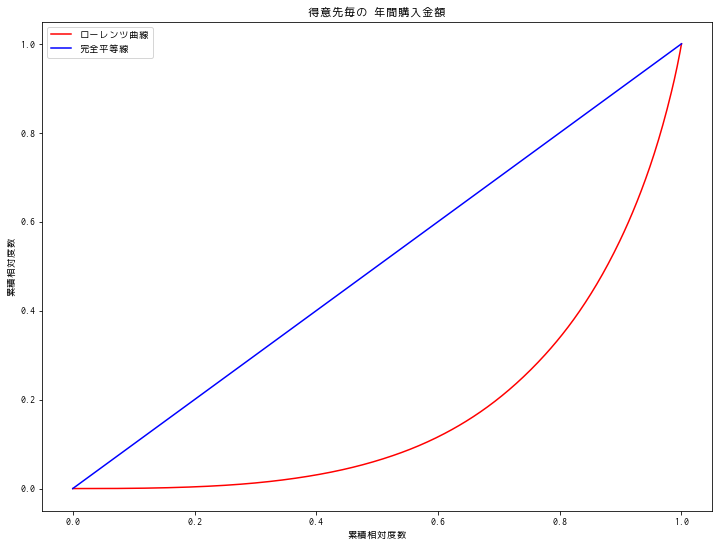

In [28]:
x = sheet2.groupby(by='得意先コード').sum().sort_values(by='売上')['売上']
x = x.cumsum()
Gini_index(x, main="得意先毎の 年間購入金額", xlab="累積相対度数", ylab="累積相対度数")

## 少数の得意先が大半の売上を占めている  

In [56]:
tokuisaki = []

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2015 and 得意先コード == '1057c'").groupby(by='月').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 得意先コード == '1057c'").groupby(by='月').sum().loc[day, '売上']

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2016 and 得意先コード == '1057c'").groupby(by='月').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 得意先コード == '1057c'").groupby(by='月').sum().loc[day, '売上']

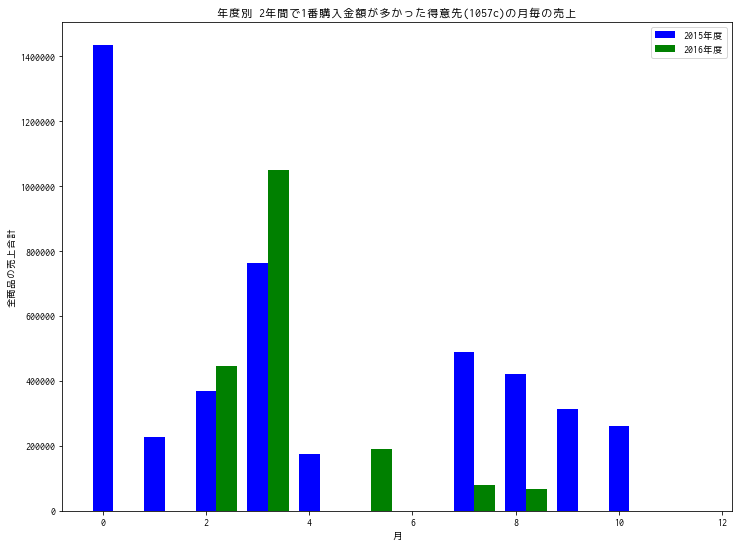

In [57]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で1番購入金額が多かった得意先(1057c)の月毎の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_tokuisaki1_month', dpi=200)
plt.show()

In [58]:
tokuisaki = []

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2015 and 得意先コード == '1411z'").groupby(by='月').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 得意先コード == '1411z'").groupby(by='月').sum().loc[day, '売上']

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2016 and 得意先コード == '1411z'").groupby(by='月').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 得意先コード == '1411z'").groupby(by='月').sum().loc[day, '売上']

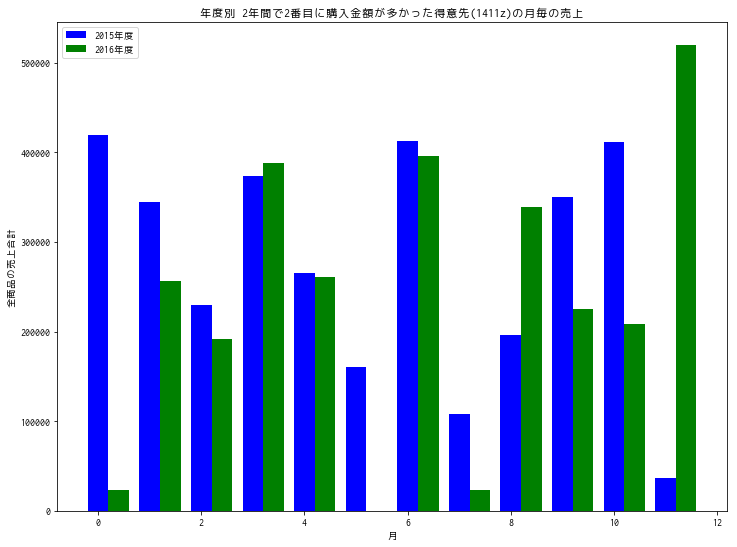

In [59]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で2番目に購入金額が多かった得意先(1411z)の月毎の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_tokuisaki2_month', dpi=200)
plt.show()

In [60]:
tokuisaki = []

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2015 and 得意先コード == '01016'").groupby(by='月').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 得意先コード == '01016'").groupby(by='月').sum().loc[day, '売上']

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2016 and 得意先コード == '01016'").groupby(by='月').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 得意先コード == '01016'").groupby(by='月').sum().loc[day, '売上']

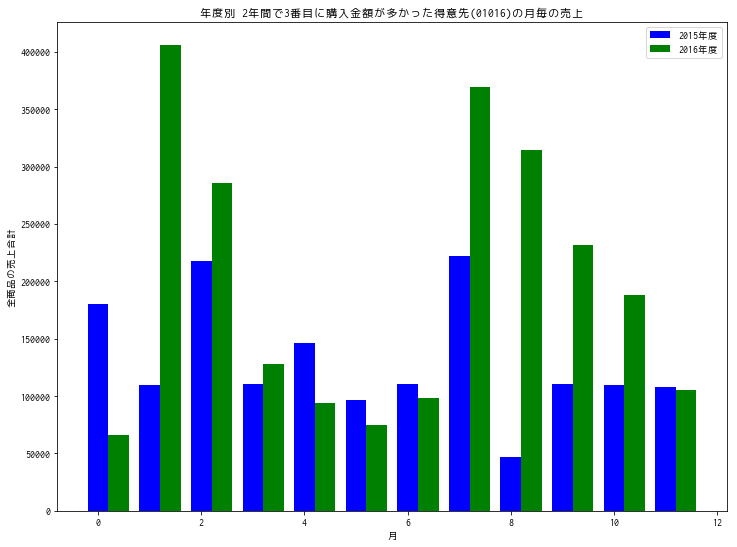

In [61]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で3番目に購入金額が多かった得意先(01016)の月毎の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_tokuisaki3_month', dpi=200)
plt.show()

In [63]:
tokuisaki = []

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2015 and 得意先コード == '1057c'").groupby(by='週').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 得意先コード == '1057c'").groupby(by='週').sum().loc[day, '売上']

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2016 and 得意先コード == '1057c'").groupby(by='週').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 得意先コード == '1057c'").groupby(by='週').sum().loc[day, '売上']

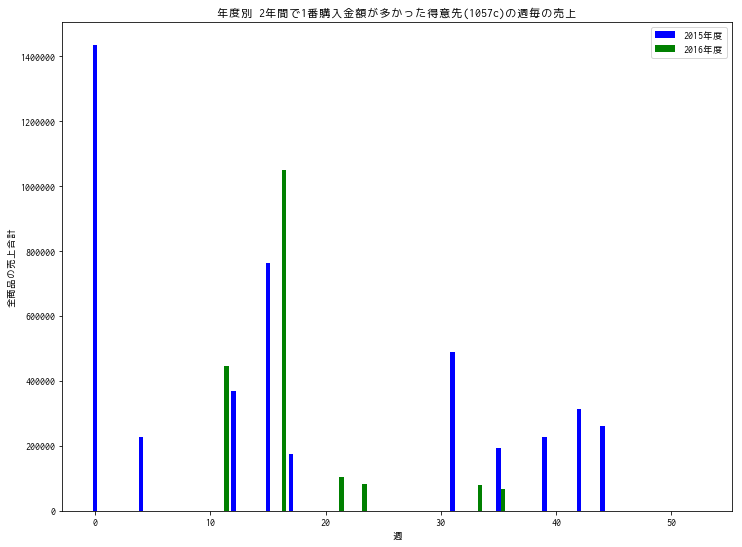

In [64]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で1番購入金額が多かった得意先(1057c)の週毎の売上')
plt.xlabel('週')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_tokuisaki1_week', dpi=200)
plt.show()

In [65]:
tokuisaki = []

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2015 and 得意先コード == '1411z'").groupby(by='週').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 得意先コード == '1411z'").groupby(by='週').sum().loc[day, '売上']

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2016 and 得意先コード == '1411z'").groupby(by='週').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 得意先コード == '1411z'").groupby(by='週').sum().loc[day, '売上']

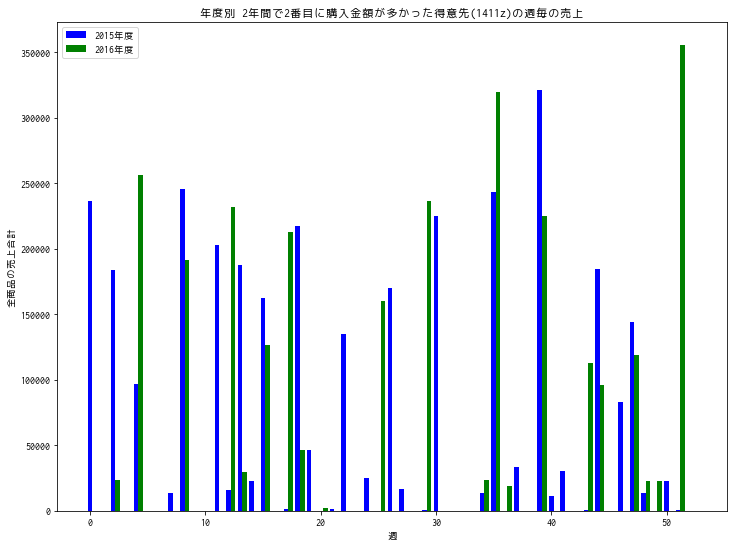

In [66]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で2番目に購入金額が多かった得意先(1411z)の週毎の売上')
plt.xlabel('週')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_tokuisaki2_week', dpi=200)
plt.show()

In [67]:
tokuisaki = []

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2015 and 得意先コード == '01016'").groupby(by='週').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 得意先コード == '01016'").groupby(by='週').sum().loc[day, '売上']

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2016 and 得意先コード == '01016'").groupby(by='週').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 得意先コード == '01016'").groupby(by='週').sum().loc[day, '売上']

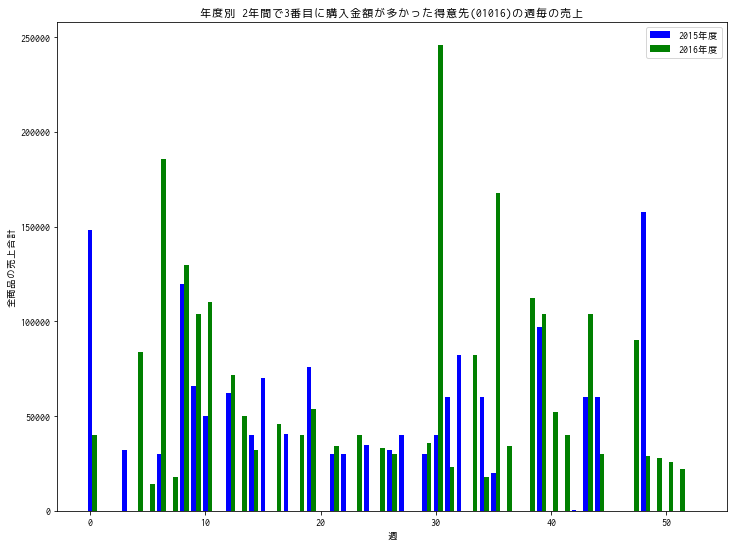

In [68]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で3番目に購入金額が多かった得意先(01016)の週毎の売上')
plt.xlabel('週')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_tokuisaki3_week', dpi=200)
plt.show()

## 各得意先からの発注時期は不規則（安定していない）
## つまり、売上の多くを占める得意先の内一つでも、発注時期を例年と変えるだけで、需要予測は的外れになる

# ・商品の概観

In [69]:
tokuisaki = []

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2015 and 商品コード == '3-310a'").groupby(by='月').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 商品コード == '3-310a'").groupby(by='月').sum().loc[day, '売上']

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2016 and 商品コード == '3-310a'").groupby(by='月').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 商品コード == '3-310a'").groupby(by='月').sum().loc[day, '売上']

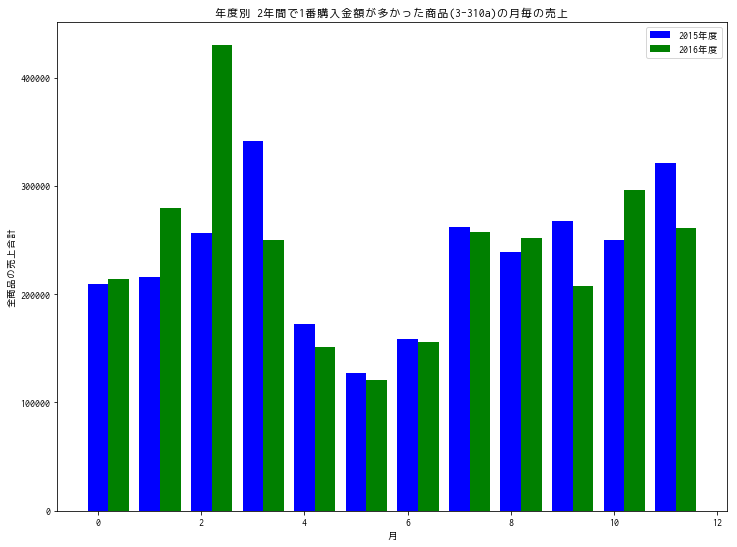

In [70]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で1番購入金額が多かった商品(3-310a)の月毎の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin1_month', dpi=200)
plt.show()

In [71]:
tokuisaki = []

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2015 and 商品コード == '3-600a'").groupby(by='月').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 商品コード == '3-600a'").groupby(by='月').sum().loc[day, '売上']

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2016 and 商品コード == '3-600a'").groupby(by='月').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 商品コード == '3-600a'").groupby(by='月').sum().loc[day, '売上']

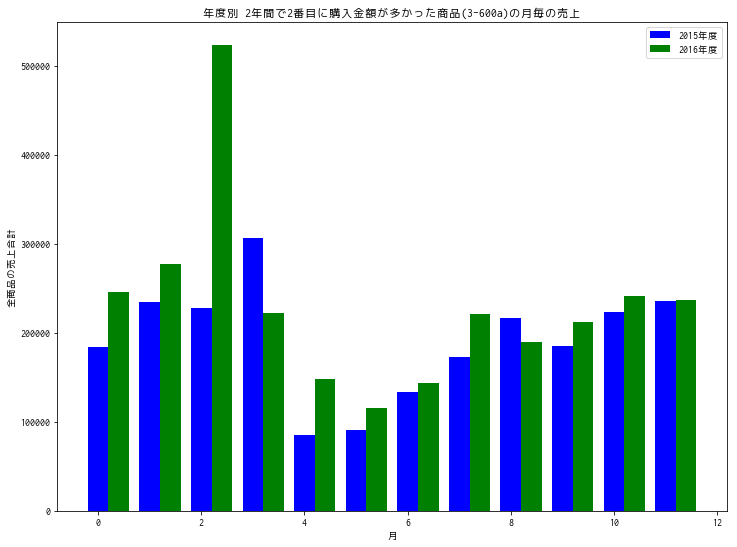

In [72]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で2番目に購入金額が多かった商品(3-600a)の月毎の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin2_month', dpi=200)
plt.show()

In [73]:
tokuisaki = []

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2015 and 商品コード == '3-393a'").groupby(by='月').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 商品コード == '3-393a'").groupby(by='月').sum().loc[day, '売上']

tokuisaki.append(np.zeros(12))
for day in sheet2.query("年度 == 2016 and 商品コード == '3-393a'").groupby(by='月').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 商品コード == '3-393a'").groupby(by='月').sum().loc[day, '売上']

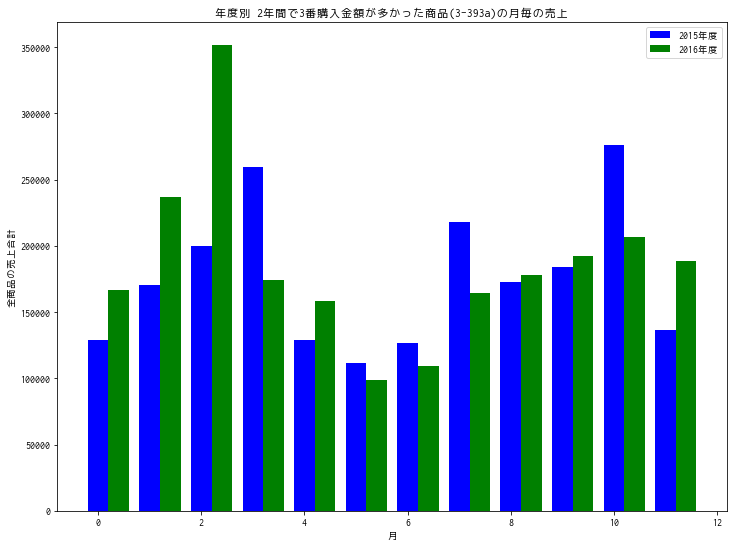

In [74]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で3番購入金額が多かった商品(3-393a)の月毎の売上')
plt.xlabel('月')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin3_month', dpi=200)
plt.show()

In [75]:
tokuisaki = []

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2015 and 商品コード == '3-310a'").groupby(by='週').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 商品コード == '3-310a'").groupby(by='週').sum().loc[day, '売上']

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2016 and 商品コード == '3-310a'").groupby(by='週').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 商品コード == '3-310a'").groupby(by='週').sum().loc[day, '売上']

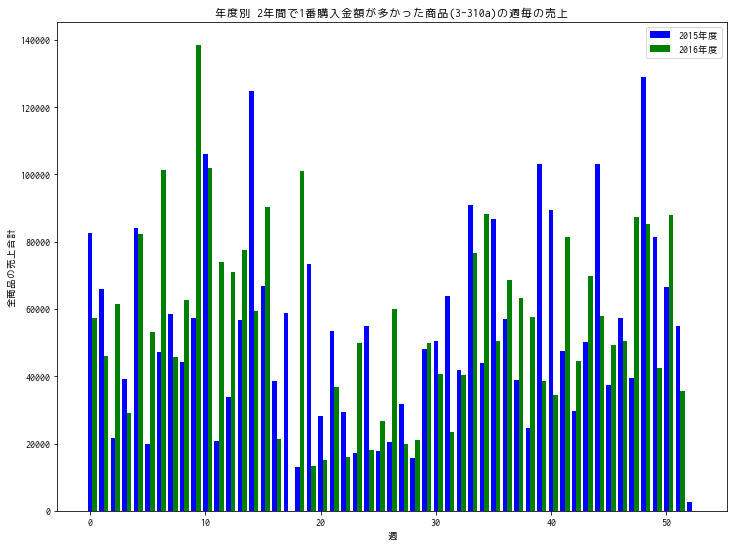

In [76]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で1番購入金額が多かった商品(3-310a)の週毎の売上')
plt.xlabel('週')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin1_week', dpi=200)
plt.show()

In [77]:
tokuisaki = []

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2015 and 商品コード == '3-600a'").groupby(by='週').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 商品コード == '3-600a'").groupby(by='週').sum().loc[day, '売上']

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2016 and 商品コード == '3-600a'").groupby(by='週').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 商品コード == '3-600a'").groupby(by='週').sum().loc[day, '売上']

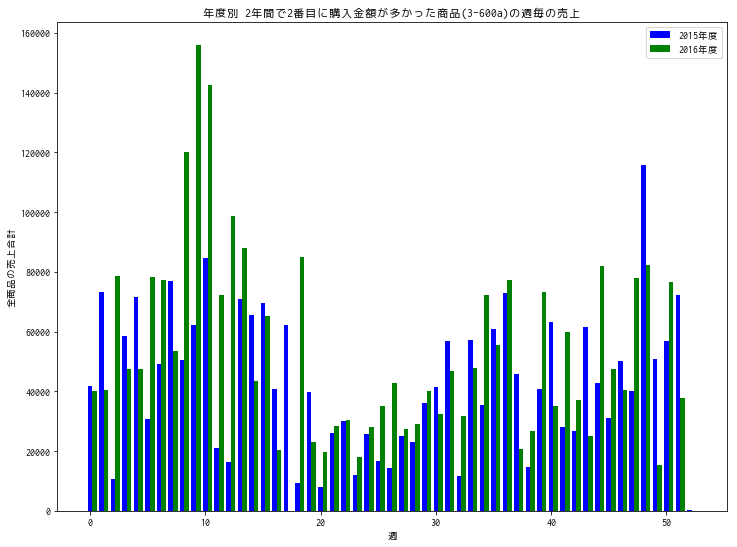

In [78]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で2番目に購入金額が多かった商品(3-600a)の週毎の売上')
plt.xlabel('週')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin2_week', dpi=200)
plt.show()

In [79]:
tokuisaki = []

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2015 and 商品コード == '3-393a'").groupby(by='週').sum().index:
    tokuisaki[0][day - 1] = sheet2.query(
        "年度 == 2015 and 商品コード == '3-393a'").groupby(by='週').sum().loc[day, '売上']

tokuisaki.append(np.zeros(53))
for day in sheet2.query("年度 == 2016 and 商品コード == '3-393a'").groupby(by='週').sum().index:
    tokuisaki[1][day - 1] = sheet2.query(
        "年度 == 2016 and 商品コード == '3-393a'").groupby(by='週').sum().loc[day, '売上']

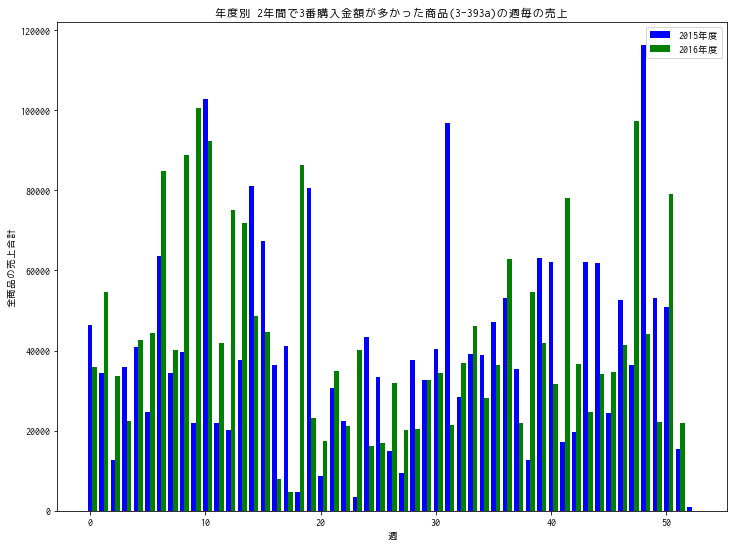

In [80]:
w = 0.4
Y1 = tokuisaki[0]
Y2 = tokuisaki[1]
X = np.arange(len(Y1))

plt.figure(figsize=(12, 9))
plt.bar(X, Y1, color='b', width=w, label='2015年度', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='2016年度', align="center")
plt.legend(loc="best")
plt.title('年度別 2年間で3番購入金額が多かった商品(3-393a)の週毎の売上')
plt.xlabel('週')
plt.ylabel('全商品の売上合計')

#plt.savefig('uriage_shouhin3_week', dpi=200)
plt.show()

## 商品によっては、需要予測がまずまずの精度で可能なものがありそう